Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 4801 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): BROKERTITLE, TYPE, ADDRESS, STATE, MAIN_ADDRESS, ADMINISTRATIVE_AR...
dbl  (6): PRICE, BEDS, BATH, PROPERTYSQFT, LATITUDE, LONGITUDE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [4,801 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ BROKERTITLE                : chr [1:4801] "Brokered by Douglas Elliman  -111 Fifth Ave" "Brokered by Serhant" "Brokered by Sowae Corp" "Brokered by COMPASS" ...
 $ TYPE                       : chr [1:4801] "Condo for sale" "Condo for sale" "House for sale" "Condo for sale" ...
 $ PRICE                      : num [1:4801] 3.15e+05 1.95e+08 2.60e+05 6.90e+04 5.50e+07 ...
 $ BEDS                       : num [1:4801] 2 7 4 3 7 5 2 8 1 2 ...
 $ BATH                       : num [1:4801] 2 10 2 1 2.37 ...
 $ PROPERTYSQFT               : num [1:4801] 1400 17545 2015 445 14175 ...
 $ ADDRESS                    : chr [1:4801] "2 E 55th St Unit 803" "Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse" "620 Sinclair Ave" "2 E 55th St Unit 908W33" ...
 $ STATE                      : chr [1:4801] "New York, NY 10022" "New York, NY 10019" "Staten Island, NY 10312" "Manhattan, NY 10022" ...
 $ MAIN_ADDRESS               :

 BROKERTITLE            TYPE               PRICE                BEDS       
 Length:4801        Length:4801        Min.   :2.494e+03   Min.   : 1.000  
 Class :character   Class :character   1st Qu.:4.990e+05   1st Qu.: 2.000  
 Mode  :character   Mode  :character   Median :8.250e+05   Median : 3.000  
                                       Mean   :2.357e+06   Mean   : 3.357  
                                       3rd Qu.:1.495e+06   3rd Qu.: 4.000  
                                       Max.   :2.147e+09   Max.   :50.000  
      BATH         PROPERTYSQFT     ADDRESS             STATE          
 Min.   : 0.000   Min.   :  230   Length:4801        Length:4801       
 1st Qu.: 1.000   1st Qu.: 1200   Class :character   Class :character  
 Median : 2.000   Median : 2184   Mode  :character   Mode  :character  
 Mean   : 2.374   Mean   : 2184                                        
 3rd Qu.: 3.000   3rd Qu.: 2184                                        
 Max.   :50.000   Max.   :65535     

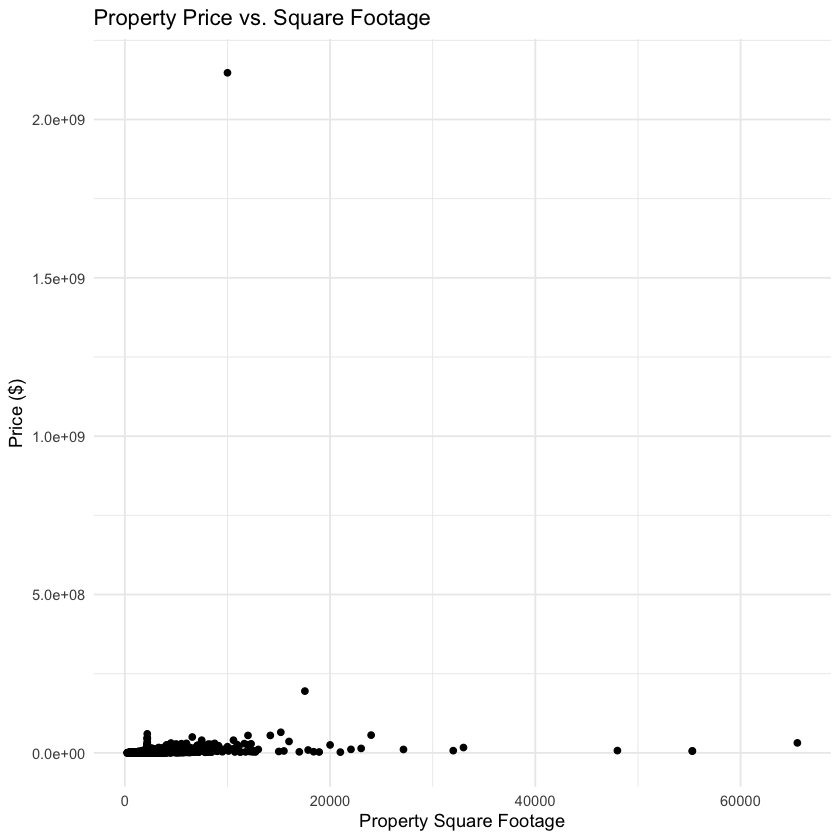

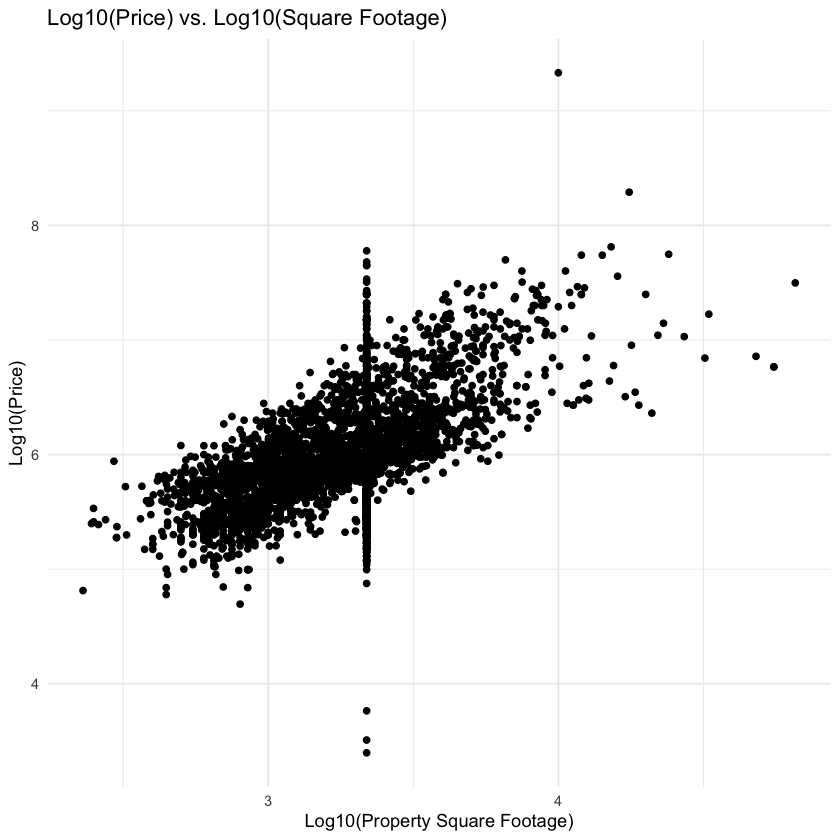

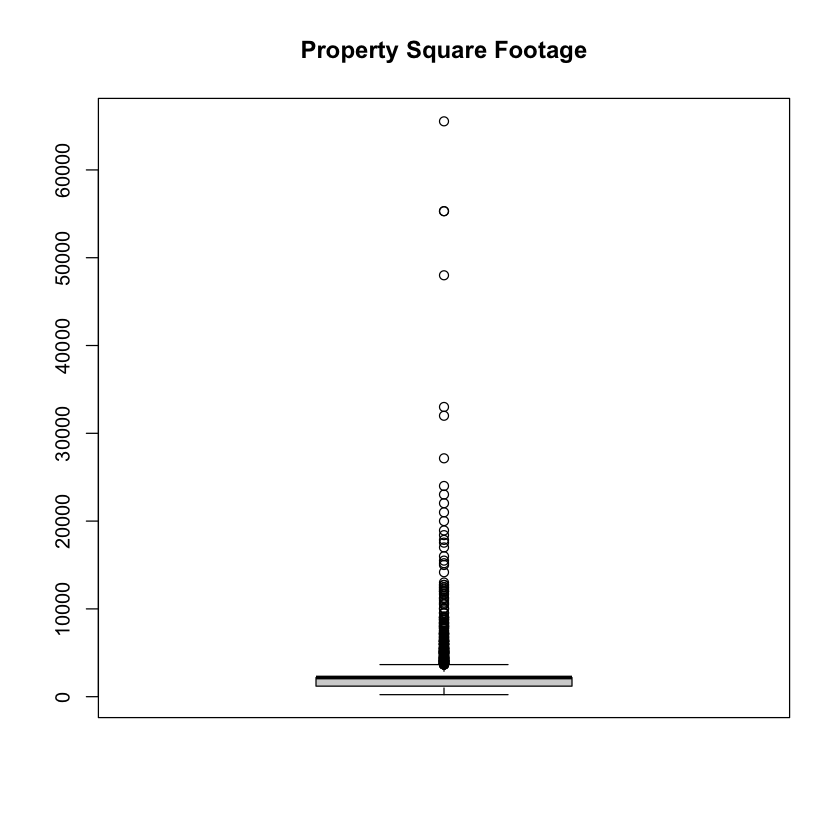

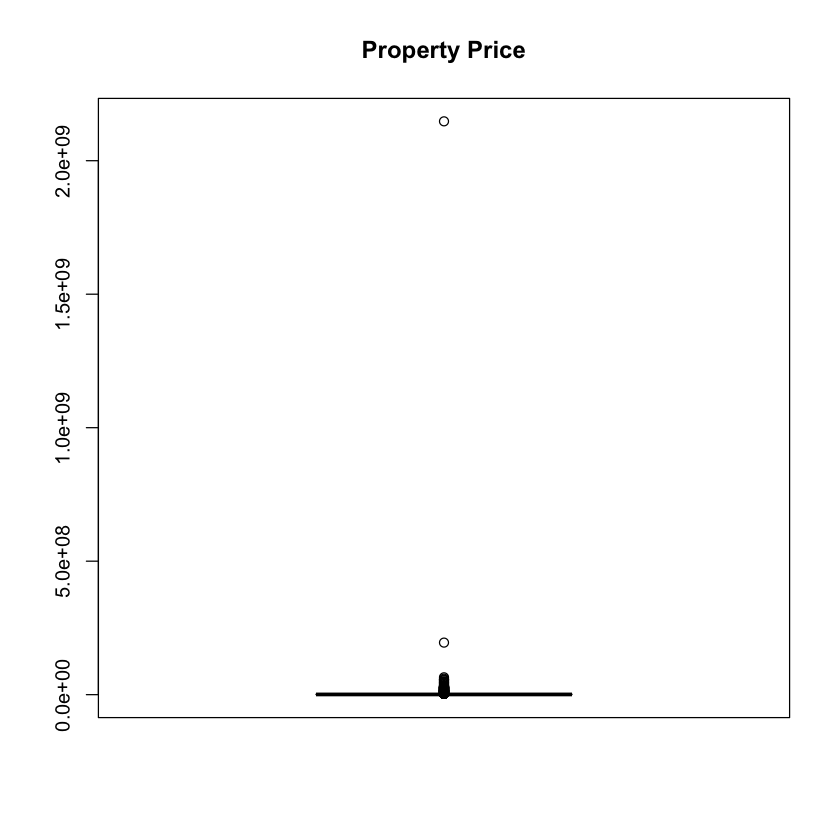

In [1]:
################################
# NY House Regression Analysis #
################################

# Load required libraries
library(readr)
library(ggplot2)
library(e1071)  # For SVM
library(caret)  # For model training utilities
library(dplyr)  # For data manipulation

# Read dataset
NY_House_Dataset <- read_csv("NY-House-Dataset.csv")

# Examine the dataset structure
str(NY_House_Dataset)
summary(NY_House_Dataset)

# Visualize relationship between square footage and price
ggplot(NY_House_Dataset, aes(x = PROPERTYSQFT, y = PRICE)) +
  geom_point() +
  labs(title = "Property Price vs. Square Footage",
       x = "Property Square Footage",
       y = "Price ($)") +
  theme_minimal()

# Log transformation for better model fit
ggplot(NY_House_Dataset, aes(x = log10(PROPERTYSQFT), y = log10(PRICE))) +
  geom_point() +
  labs(title = "Log10(Price) vs. Log10(Square Footage)",
       x = "Log10(Property Square Footage)",
       y = "Log10(Price)") +
  theme_minimal()

# Data cleaning - remove outliers
# First identify potential outliers
boxplot(NY_House_Dataset$PROPERTYSQFT, main="Property Square Footage")
boxplot(NY_House_Dataset$PRICE, main="Property Price")

# Clean dataset by removing the same outlier as in the professor's code
clean_dataset <- NY_House_Dataset[-which(NY_House_Dataset$PROPERTYSQFT==2184.207862),]

# Create training and test sets with 75/25 split
set.seed(42) # For reproducibility
train_indices <- sample(nrow(clean_dataset), 0.75 * nrow(clean_dataset))
train_data <- clean_dataset[train_indices, ]
test_data <- clean_dataset[-train_indices, ]



Call:
lm(formula = log10(PRICE) ~ log10(PROPERTYSQFT), data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96555 -0.19822 -0.05138  0.18575  2.44483 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.41293    0.06259   38.55   <2e-16 ***
log10(PROPERTYSQFT)  1.11854    0.01945   57.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2926 on 2383 degrees of freedom
Multiple R-squared:  0.5811,	Adjusted R-squared:  0.5809 
F-statistic:  3306 on 1 and 2383 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


Linear Regression Model Error Metrics:
MAE: 0.2356449 
MSE: 0.08558202 
RMSE: 0.292544 



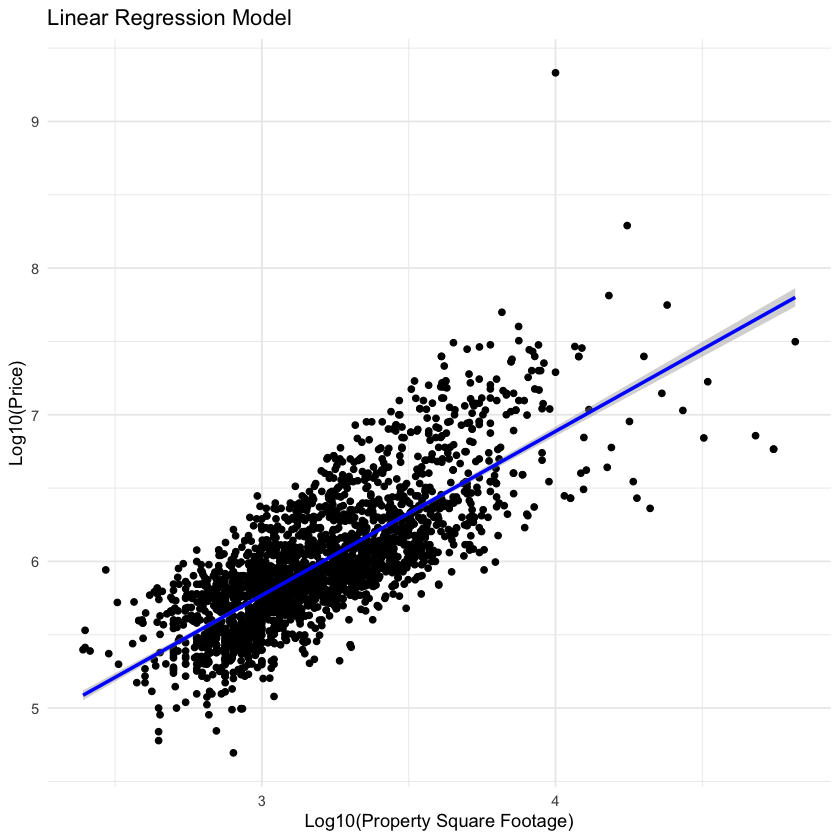

In [2]:
#################################################
# Model 1: Linear Regression                    #
#################################################

# Train linear regression model using log transformation
lm_model <- lm(log10(PRICE) ~ log10(PROPERTYSQFT), data = train_data)

# Examine model summary
summary(lm_model)

# Visualize the linear model fit
ggplot(train_data, aes(x = log10(PROPERTYSQFT), y = log10(PRICE))) +
  geom_point() +
  stat_smooth(method = "lm", col = "blue") +
  labs(title = "Linear Regression Model",
       x = "Log10(Property Square Footage)",
       y = "Log10(Price)") +
  theme_minimal()

# Predictions on test data
lm_predictions <- predict(lm_model, test_data)

# Calculate errors
lm_errors <- lm_predictions - log10(test_data$PRICE)

# Calculate error metrics
lm_mae <- mean(abs(lm_errors))
lm_mse <- mean(lm_errors^2)
lm_rmse <- sqrt(lm_mse)

# Print results
cat("Linear Regression Model Error Metrics:\n")
cat("MAE:", lm_mae, "\n")
cat("MSE:", lm_mse, "\n")
cat("RMSE:", lm_rmse, "\n\n")

In [3]:
#################################################
# Model 2: Support Vector Machine (Linear)      #
#################################################

# Train linear SVM model
svm_linear_model <- svm(log10(PRICE) ~ log10(PROPERTYSQFT), 
                        data = train_data, 
                        kernel = "linear")

# Examine model summary
summary(svm_linear_model)

# Predictions on test data
svm_linear_predictions <- predict(svm_linear_model, test_data)

# Calculate errors
svm_linear_errors <- svm_linear_predictions - log10(test_data$PRICE)

# Calculate error metrics
svm_linear_mae <- mean(abs(svm_linear_errors))
svm_linear_mse <- mean(svm_linear_errors^2)
svm_linear_rmse <- sqrt(svm_linear_mse)

# Print results
cat("SVM Linear Model Error Metrics:\n")
cat("MAE:", svm_linear_mae, "\n")
cat("MSE:", svm_linear_mse, "\n")
cat("RMSE:", svm_linear_rmse, "\n\n")


Call:
svm(formula = log10(PRICE) ~ log10(PROPERTYSQFT), data = train_data, 
    kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  2081






SVM Linear Model Error Metrics:
MAE: 0.2332198 
MSE: 0.09038032 
RMSE: 0.3006332 



In [4]:
#################################################
# Model 3: Support Vector Machine (Radial)      #
#################################################

# Train radial SVM model
svm_radial_model <- svm(log10(PRICE) ~ log10(PROPERTYSQFT), 
                         data = train_data, 
                         kernel = "radial")

# Examine model summary
summary(svm_radial_model)

# Predictions on test data
svm_radial_predictions <- predict(svm_radial_model, test_data)

# Calculate errors
svm_radial_errors <- svm_radial_predictions - log10(test_data$PRICE)

# Calculate error metrics
svm_radial_mae <- mean(abs(svm_radial_errors))
svm_radial_mse <- mean(svm_radial_errors^2)
svm_radial_rmse <- sqrt(svm_radial_mse)

# Print results
cat("SVM Radial Model Error Metrics:\n")
cat("MAE:", svm_radial_mae, "\n")
cat("MSE:", svm_radial_mse, "\n")
cat("RMSE:", svm_radial_rmse, "\n\n")


Call:
svm(formula = log10(PRICE) ~ log10(PROPERTYSQFT), data = train_data, 
    kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  2069






SVM Radial Model Error Metrics:
MAE: 0.2297867 
MSE: 0.08878846 
RMSE: 0.2979739 



In [5]:
#################################################
# Monte Carlo Cross-Validation                  #
#################################################

# Function to evaluate model performance using Monte Carlo CV
monte_carlo_cv <- function(model_type, k = 100) {
  mae_values <- c()
  mse_values <- c()
  rmse_values <- c()
  
  for (i in 1:k) {
    # Create random train/test split
    train_indices <- sample(nrow(clean_dataset), 0.75 * nrow(clean_dataset))
    mc_train <- clean_dataset[train_indices, ]
    mc_test <- clean_dataset[-train_indices, ]
    
    # Train model based on model_type parameter
    if (model_type == "lm") {
      model <- lm(log10(PRICE) ~ log10(PROPERTYSQFT), data = mc_train)
    } else if (model_type == "svm_linear") {
      model <- svm(log10(PRICE) ~ log10(PROPERTYSQFT), data = mc_train, kernel = "linear")
    } else if (model_type == "svm_radial") {
      model <- svm(log10(PRICE) ~ log10(PROPERTYSQFT), data = mc_train, kernel = "radial")
    }
    
    # Make predictions
    predictions <- predict(model, mc_test)
    
    # Calculate errors
    errors <- predictions - log10(mc_test$PRICE)
    
    # Calculate metrics
    mae <- mean(abs(errors))
    mse <- mean(errors^2)
    rmse <- sqrt(mse)
    
    # Store results
    mae_values <- c(mae_values, mae)
    mse_values <- c(mse_values, mse)
    rmse_values <- c(rmse_values, rmse)
  }
  
  # Return mean of all iterations
  return(list(
    mae = mean(mae_values),
    mse = mean(mse_values),
    rmse = mean(rmse_values)
  ))
}

# Run Monte Carlo CV for each model
cat("Running Monte Carlo Cross-Validation (k=100)...\n")

# Linear Regression
lm_cv_results <- monte_carlo_cv("lm")
cat("Linear Regression CV Results:\n")
cat("MAE:", lm_cv_results$mae, "\n")
cat("MSE:", lm_cv_results$mse, "\n")
cat("RMSE:", lm_cv_results$rmse, "\n\n")

# SVM Linear
svm_linear_cv_results <- monte_carlo_cv("svm_linear")
cat("SVM Linear CV Results:\n")
cat("MAE:", svm_linear_cv_results$mae, "\n")
cat("MSE:", svm_linear_cv_results$mse, "\n")
cat("RMSE:", svm_linear_cv_results$rmse, "\n\n")

# SVM Radial
svm_radial_cv_results <- monte_carlo_cv("svm_radial")
cat("SVM Radial CV Results:\n")
cat("MAE:", svm_radial_cv_results$mae, "\n")
cat("MSE:", svm_radial_cv_results$mse, "\n")
cat("RMSE:", svm_radial_cv_results$rmse, "\n\n")

Running Monte Carlo Cross-Validation (k=100)...
Linear Regression CV Results:
MAE: 0.2327881 
MSE: 0.08597538 
RMSE: 0.2931245 

SVM Linear CV Results:
MAE: 0.2281395 
MSE: 0.08879322 
RMSE: 0.2978336 

SVM Radial CV Results:
MAE: 0.2242932 
MSE: 0.08634782 
RMSE: 0.2937072 



              Model       MAE        MSE      RMSE
1 Linear Regression 0.2327881 0.08597538 0.2931245
2        SVM Linear 0.2281395 0.08879322 0.2978336
3        SVM Radial 0.2242932 0.08634782 0.2937072


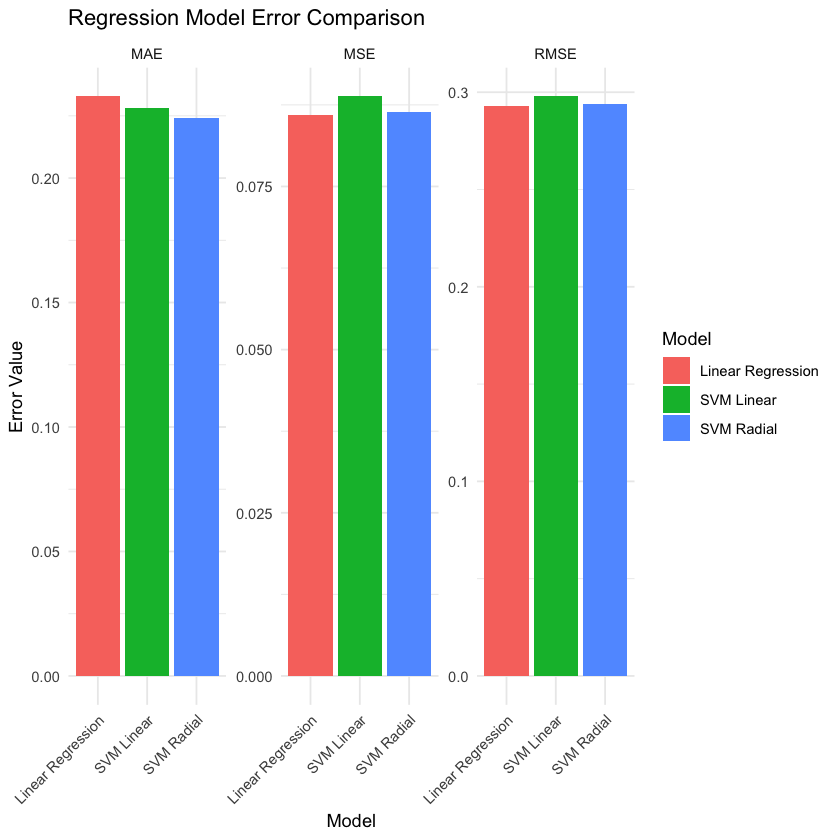

In [7]:
#################################################
# Results Comparison                            #
#################################################

# Create comparison dataframe
models <- c("Linear Regression", "SVM Linear", "SVM Radial")
mae_values <- c(lm_cv_results$mae, svm_linear_cv_results$mae, svm_radial_cv_results$mae)
mse_values <- c(lm_cv_results$mse, svm_linear_cv_results$mse, svm_radial_cv_results$mse)
rmse_values <- c(lm_cv_results$rmse, svm_linear_cv_results$rmse, svm_radial_cv_results$rmse)

comparison_df <- data.frame(
  Model = models,
  MAE = mae_values,
  MSE = mse_values,
  RMSE = rmse_values
)

# Print comparison table
print(comparison_df)

# Visualize model comparisons
model_comparison <- data.frame(
  Model = rep(models, 3),
  Metric = c(rep("MAE", 3), rep("MSE", 3), rep("RMSE", 3)),
  Value = c(mae_values, mse_values, rmse_values)
)

ggplot(model_comparison, aes(x = Model, y = Value, fill = Model)) +
  geom_bar(stat = "identity") +
  facet_wrap(~Metric, scales = "free_y") +
  labs(title = "Regression Model Error Comparison",
       x = "Model",
       y = "Error Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [8]:
#################################################
# Conclusion                                    #
#################################################

# Identify best model based on each metric
best_mae_model <- models[which.min(mae_values)]
best_mse_model <- models[which.min(mse_values)]
best_rmse_model <- models[which.min(rmse_values)]

cat("Best model based on MAE:", best_mae_model, "\n")
cat("Best model based on MSE:", best_mse_model, "\n")
cat("Best model based on RMSE:", best_rmse_model, "\n")

Best model based on MAE: SVM Radial 
Best model based on MSE: Linear Regression 
Best model based on RMSE: Linear Regression 
